/var/folders/6s/wqp33w8x1s79241ysd40kr500000gn/T/ipykernel_15117/3978687935.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", len(params))


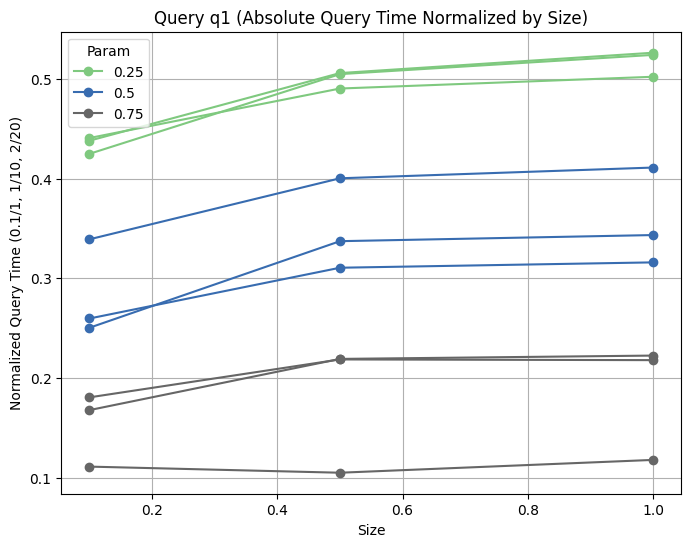

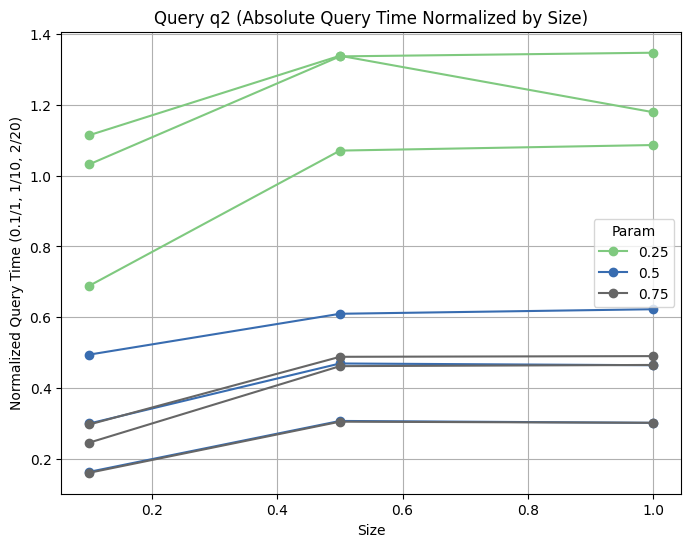

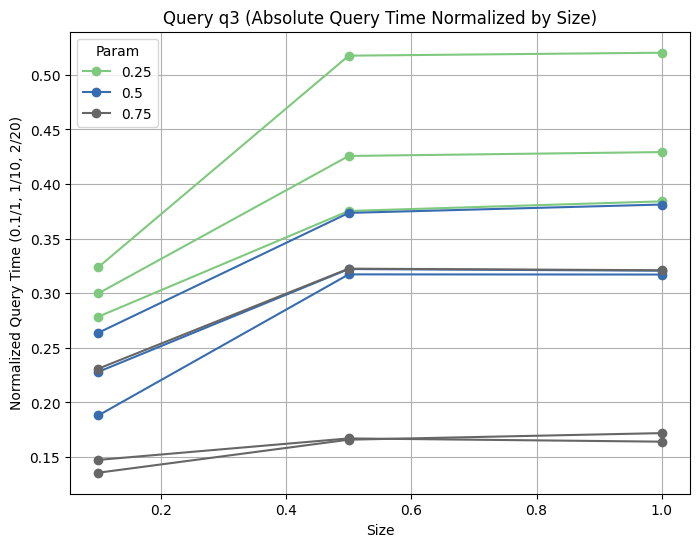

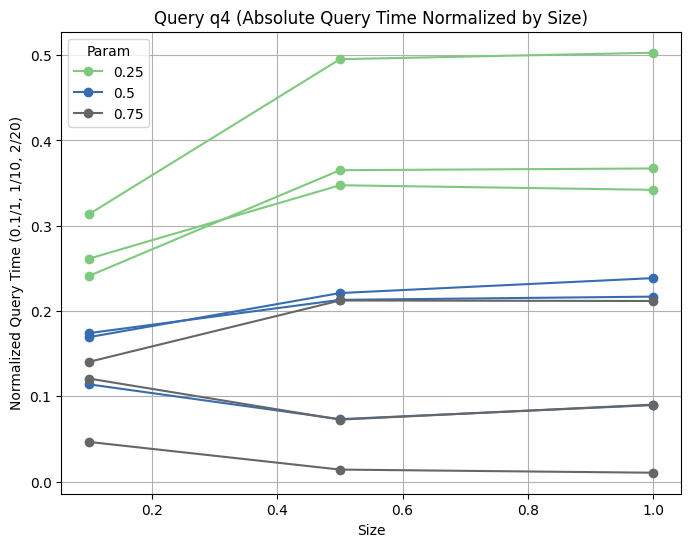

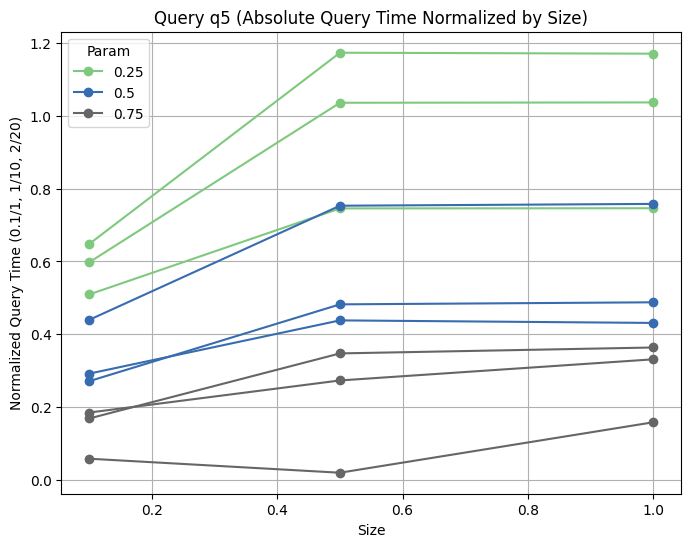

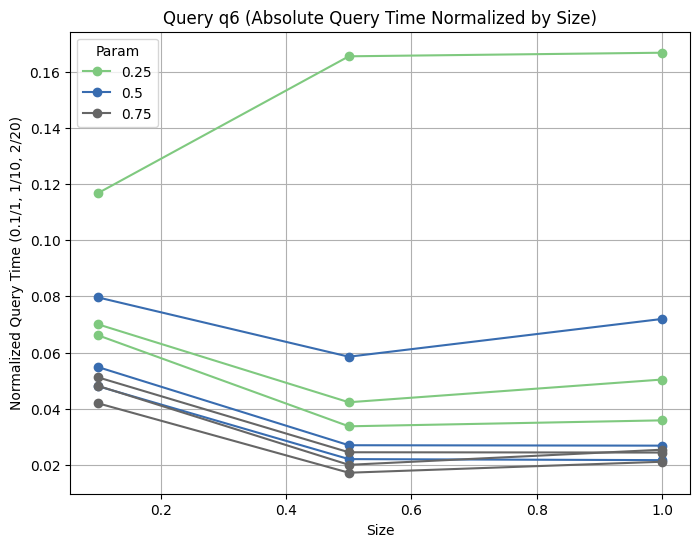

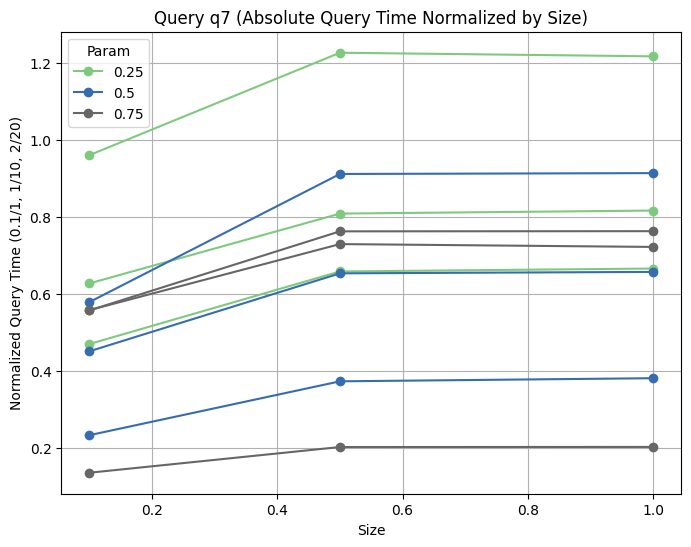

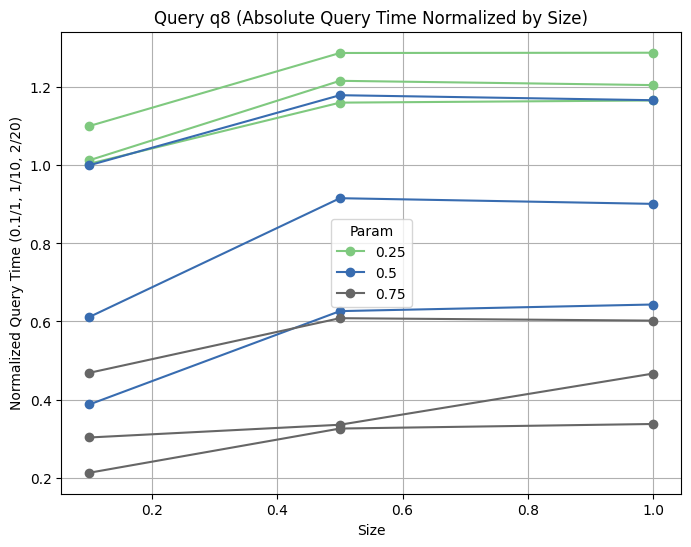

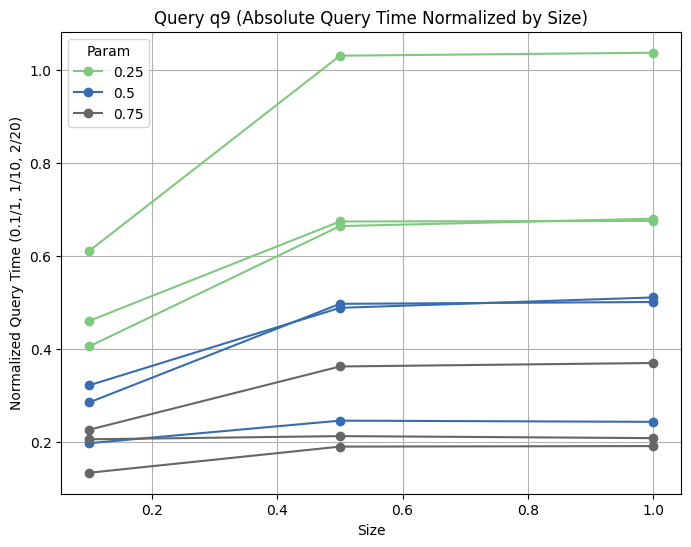

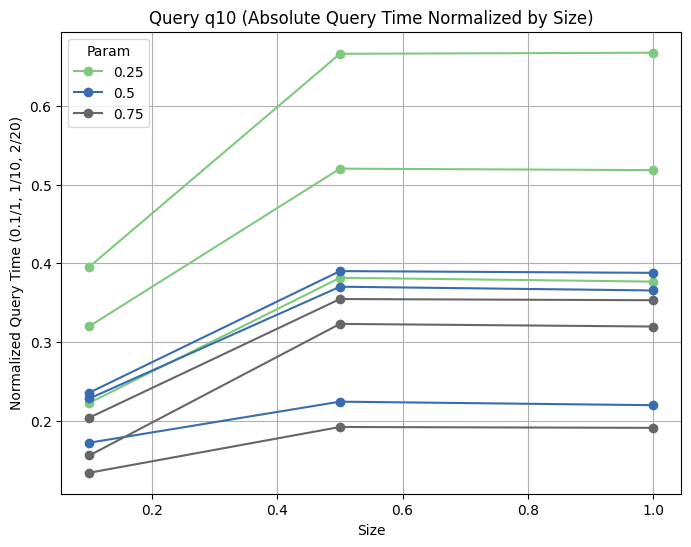

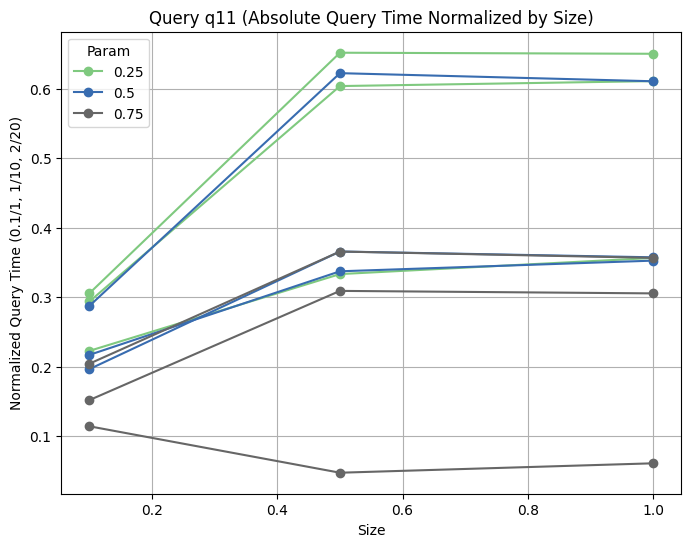

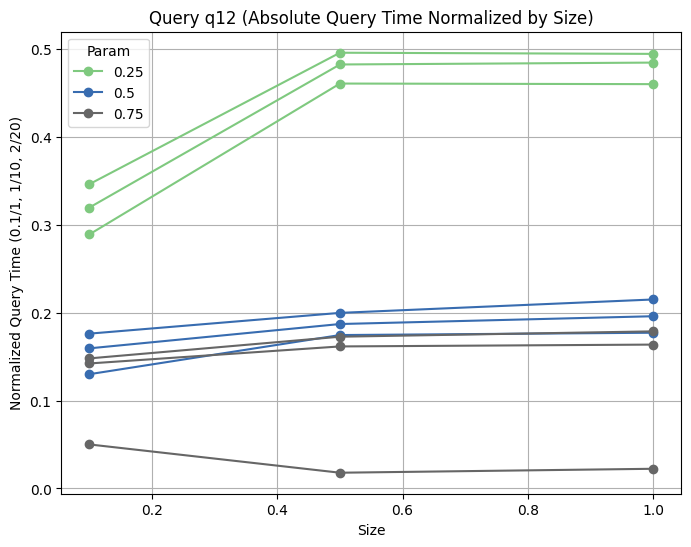

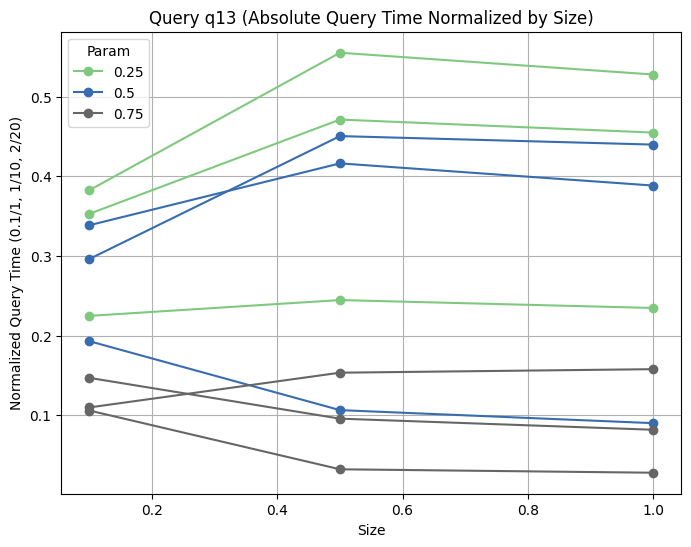

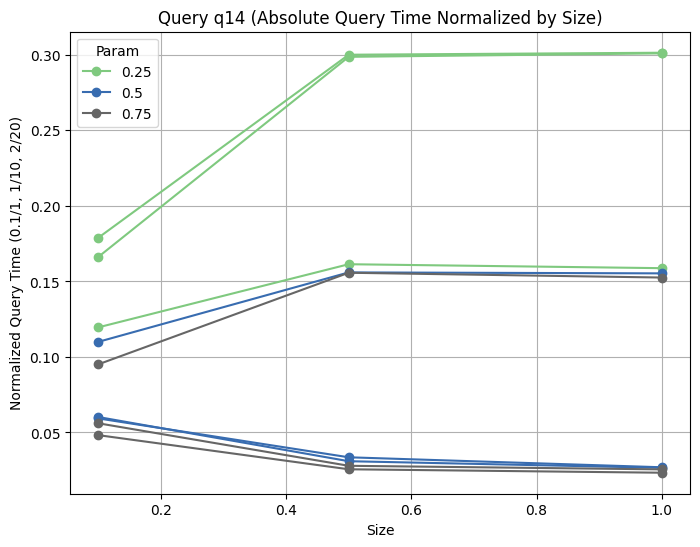

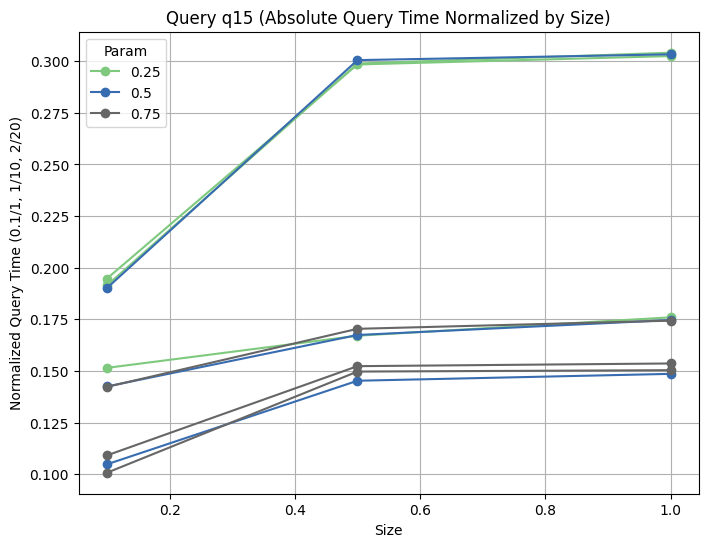

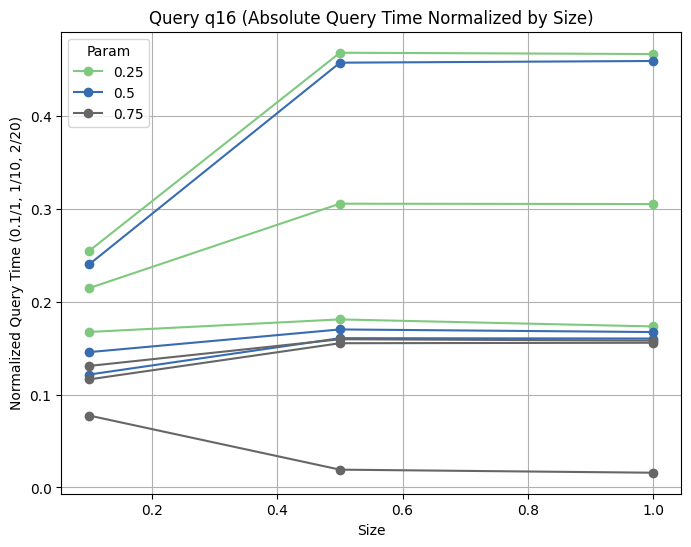

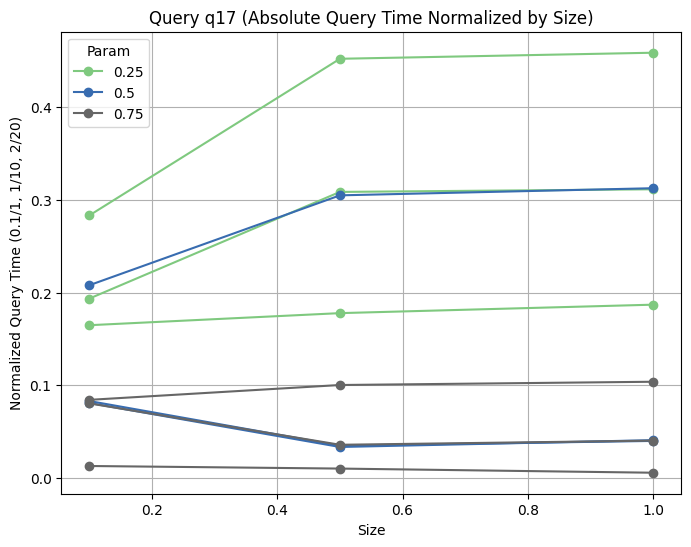

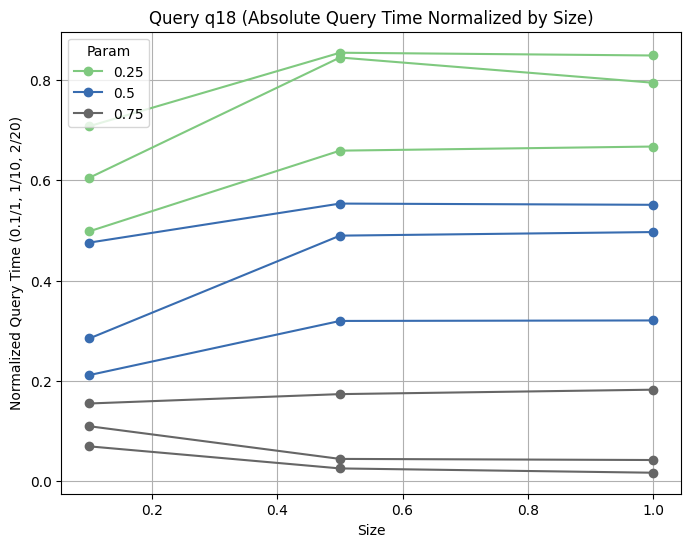

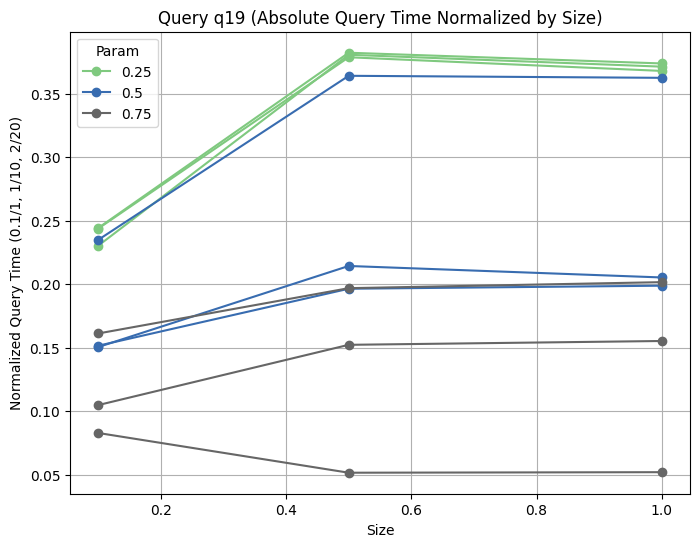

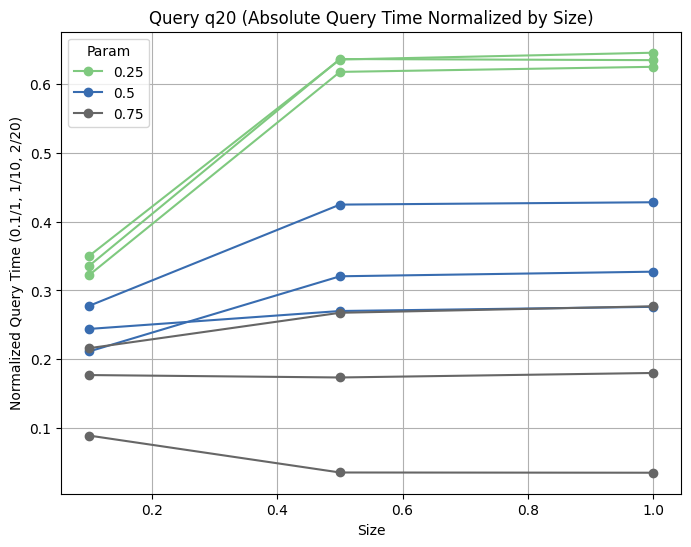

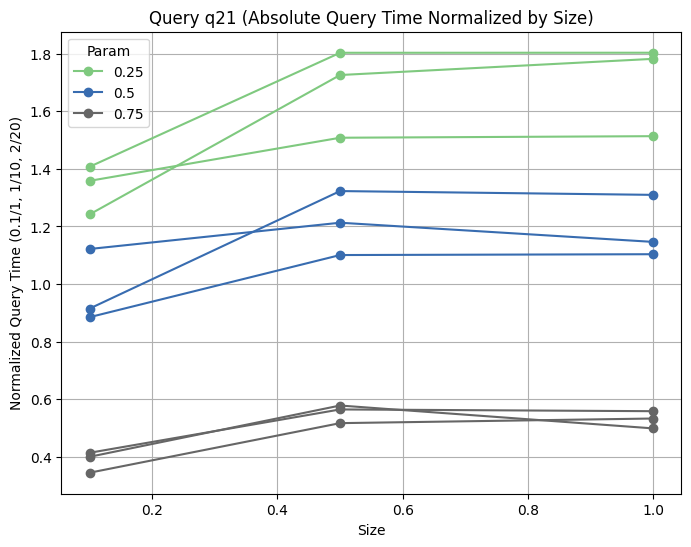

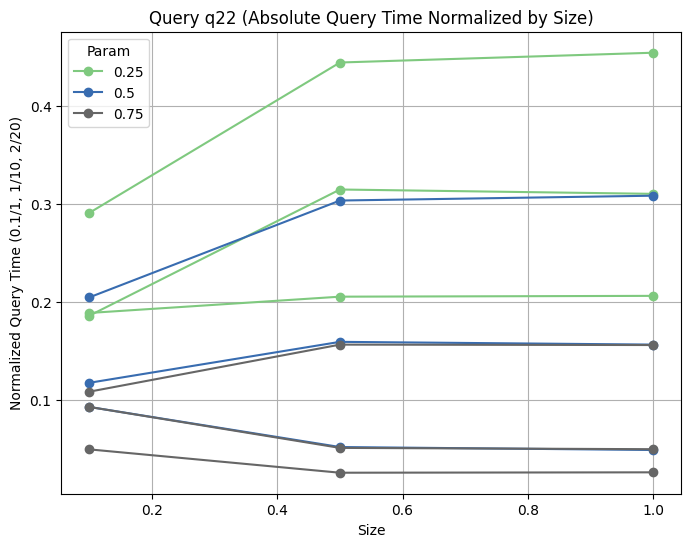

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_PATH = "../results/verify-datasize-irrelevance/tpch/2025-03-20-11H/"

# Read the CSV file
df = pd.read_csv(RESULTS_PATH + 'meta_data.csv')
df['Scale_factor'] = pd.to_numeric(df['Scale_factor'])

# Create a new column with the normalized query time.
# For each row, the total query time is divided by (Scale_factor * 10)
df['normalized_time_by_size'] = df.apply(lambda row: row['Avg (last 4 runs)'] / (row['Scale_factor'] * 10), axis=1)

# Get unique queries to loop over
queries = df['Query'].unique()

for query in queries:
    # Filter data for the current query
    df_query = df[df['Query'] == query]
    
    plt.figure(figsize=(8, 6))
    
    # Get unique parameters and assign each a color from a colormap
    params = df_query['Param'].unique()
    cmap = plt.cm.get_cmap("Accent", len(params))
    
    for i, param in enumerate(params):
        # Filter data for the current parameter
        df_param = df_query[df_query['Param'] == param]
        replicates = df_param['Replicate'].unique()
        
        for j, rep in enumerate(replicates):
            # Filter data for the current replicate and sort by Scale_factor
            df_rep = df_param[df_param['Replicate'] == rep].copy().sort_values(by='Scale_factor')
            
            # Label only the first replicate for the legend
            if j == 0:
                plt.plot(df_rep['Scale_factor'], df_rep['normalized_time_by_size'], marker='o',
                         label=str(param), color=cmap(i))
            else:
                plt.plot(df_rep['Scale_factor'], df_rep['normalized_time_by_size'], marker='o',
                         color=cmap(i))
    
    plt.title(f'Query {query} (Absolute Query Time Normalized by Size)')
    plt.xlabel('Size')
    plt.ylabel('Normalized Query Time (0.1/1, 1/10, 2/20)')
    plt.legend(title='Param')
    plt.grid(True)
    plt.show()


In [41]:
import matplotlib.pyplot as plt
print(plt.cm.cmap_d.keys())

AttributeError: module 'matplotlib.cm' has no attribute 'cmap_d'